## neural_network_regression.ipynb
## 머신러닝
## 1. Supervised (Regression, Classification)
## 2. Non-supervised
## 3. Reinforce

## regression 문제 해결! (특정 값인 숫자를 예측하고자는 것)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])  # feature

In [3]:
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.]) # 라벨

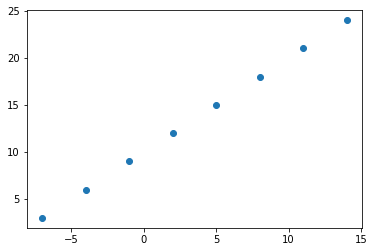

In [4]:
plt.scatter(X, y)

## 모델링 (modelling) : X와 y에 숨겨진 pattern(패턴)을 찾고 계산, 수식으로 표현하고 싶다!

In [5]:
import tensorflow as tf

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price, house_info.shape, house_price.shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>,
 TensorShape([3]),
 TensorShape([1]))

## 신경망 (neural network)을 활용할 때 가장 중요한 개념중에 하나가 입력 shape, 출력 shape
## input shape (입력 shape) : 모델에 입력할 데이터의 shape
## output shape (출력 shape) : 입력한 데이터를 모델이 처리하고 내보내는 결과의 shape
## input shape, output shape를 우리가 해결하려는 문제에 따라서 항상 다르다!
## 신경망은 숫자를 받아들이고, 숫자로 결과를 알려줍니다. 일반적으로 이러한 숫자들은 tensor 및 array로 표현합니다.


## 입력인 X를 통해서 y를 예측하고 싶다! ==> regression

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape

X[0], input_shape, y[0], output_shape

(-7.0, (), 3.0, ())

## TensorFlow로 모델링을 하는 과정, 즉 모델을 생성하고 학습하는 3가지 과정
## 1. 모델을 create : 직접 신경망의 계층을 추가합니다 / 이전에 만들어진 모델을 가져와서 사용 (전이학습 transfer learning)
## 2. 모델을 compile : 모델의 성능을 평가할 수 있는 지표 지정 (loss/metrics)하고 모델이 어떻게 개선되어야할지 정의 (optimizer)
## 3. 모델을 fit : 데이터에서 패턴을 찾도록 시키는 것

In [7]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

# 3. 모델을 fit
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 204ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 998us/step - loss: 10.9748 - mae: 10.9748


In [15]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [16]:
# 4. 만들고 학습한 모델로 predict
model.predict([17.0])

array([[12.716021]], dtype=float32)

In [17]:
model.predict([-10.0])

array([[-7.4006]], dtype=float32)

## 학습한 모델의 결과가 좋지 않아요!
## 모델을 성능을 더 좋게 만들어야 합니다.
## 1. 모델을 create : 계층을 추가해 준다! / 계층을 구성하는 neuron을 추가 / actionvation function (활성화 함수)를 바꿔본다
## 2. 모델을 compile : optimization function (최적화 함수)를 바꿔본다 / 최적화 함수의 learning rate를 변경
## 3. 모델을 fit : 더 많이 공부, 즉 학습 epoch를 늘린다! => 시간이 늘어난다 / 학습하는 데이터를 더 많이 준다!

## 계층을 추가해 준다! / 계층을 구성하는 neuron을 추가 / 최적화 함수의 learning rate를 변경 (Data Augmentation)
## 지금까지 모델을 개선하기 위해서 설명한 위의 내용들은 개발자가 직접 변경할 수 있다!
## hyperparameter라고 합니다.
## hyperparameter를 우리가 직접 수정하는 그 과정 => hyperparameter tuning!

In [8]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

# 3. 모델을 fit
model.fit(X, y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 0s 138ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 997us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 998us/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 998us/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 2ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 997us/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 998us/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 996us/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [===========================

In [9]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [10]:
model.predict([17.0])

array([[30.908516]], dtype=float32)

## 모델 평가 (Evaluating a model)
## 일반적인 신경망을 만드는 과정
## 모델 생성 -> 모델 평가 -> 평가를 기반으로 모델 수정 -> 모델 평가 -> 평가를 기반으로 모델 수정 ... 반복
## 수정이라는 표현은 모델을 다시 만든다라고 하기 보다 기존 설정을 변경한다라는 의미
## 시각화로 모델을 쉽고 직관적으로 평가를 하려합니다. 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [13]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [14]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## 전체 데이터를 학습 데이터 / 테스트 데이터로 나누기 (split)
## 머신러닝 프로젝트에서 가장 일반적이고 중요한 단계 중에 하나!
## 필요하다면 검증용 데이터도 필요!
## Training Set : 이 데이터로 모델이 학습, 일반적으로 전체 데이터셋에서 약 70~80% 정도를 취한다. (학습) 
## Validation Set : 이 데이터로 학습 중인 모델을 검증, 일반적으로 약 10~15% 정도를 취한다. (모의고사) 
## Test Set : 이 데이터로 학습한 모델을 평가, 일반적으로 약 10~15% 정도를 취한다. (수능)

In [15]:
len(X), len(y)

(50, 50)

In [16]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

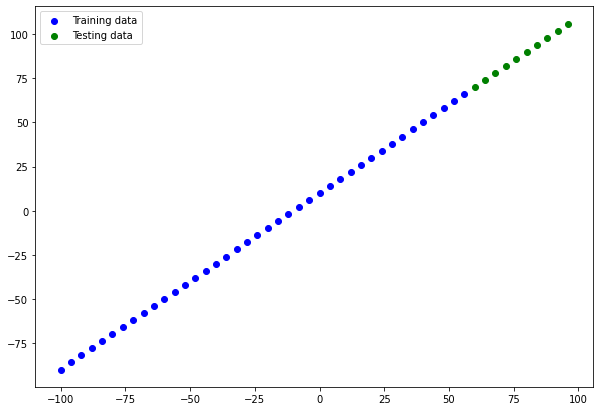

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, c = "b", label = "Training data")
plt.scatter(X_test, y_test, c = "g", label="Testing data")
plt.legend();

In [19]:
tf.random.set_seed(42)

# 1. 모델을 create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. 모델을 compile
model.compile(
    loss = tf.keras.losses.mae,   # mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # short for stochastic gradient descent
    metrics = ["mae"]
)

In [31]:
# 3. 모델을 fit
model.fit(X, y, epochs = 100, verbose = 0)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
X_test

array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])

In [33]:
y_preds = model.predict(X_test)

In [34]:
y_preds, len(y_preds)

(array([[52.780174],
        [55.977085],
        [59.173996],
        [62.370903],
        [65.56782 ],
        [68.764725],
        [71.96163 ],
        [75.15855 ],
        [78.35545 ],
        [81.55236 ]], dtype=float32),
 10)

In [35]:
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
):
    plt.figure(figsize = (10, 7))
    plt.scatter(train_data, train_labels, c = "b", label = "Traning data")
    plt.scatter(test_data, test_labels, c = "g", label = "Testing data")
    plt.scatter(test_data, predictions, c = "r", label = "Predictions")
    plt.legend()

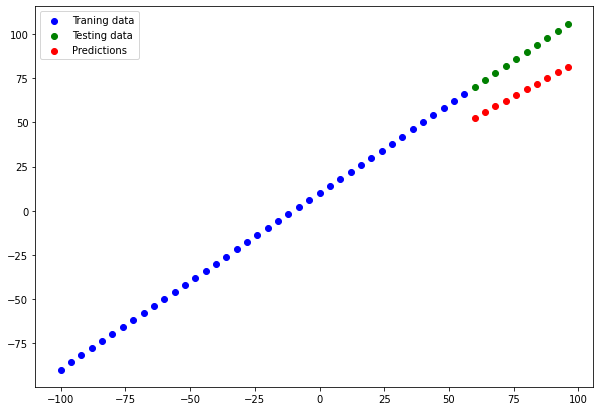

In [36]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_preds
)